# Test 4 Assignment

### Installation of all necessary libraries

In [1]:
!pip install scikit-learn
!pip install boruta
!pip install xgboost
!pip install scikit-optimize

### Import of the libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn

### Reading the data

In [3]:
#Read the features and index from csv files
import os
import pandas as pd
dfA= pd.read_csv("testset4/testset4A.csv",header=None, index_col=False)
dfB= pd.read_csv("testset4/testset4B.csv",header=None, index_col=False)
dfC= pd.read_csv("testset4/testset4C.csv",header=None, index_col=False)
dfD= pd.read_csv("testset4/testset4D.csv",header=None, index_col=False)
dfE= pd.read_csv("testset4/testset4E.csv",header=None, index_col=False)
frames = [dfA, dfB, dfC, dfD, dfE]
df = pd.concat(frames,axis=0, ignore_index=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       80000 non-null  float64
 1   1       80000 non-null  float64
 2   2       80000 non-null  float64
 3   3       80000 non-null  float64
 4   4       80000 non-null  float64
 5   5       80000 non-null  float64
 6   6       80000 non-null  float64
 7   7       80000 non-null  float64
 8   8       80000 non-null  float64
 9   9       80000 non-null  float64
 10  10      80000 non-null  float64
 11  11      80000 non-null  float64
 12  12      80000 non-null  float64
 13  13      80000 non-null  float64
 14  14      80000 non-null  float64
 15  15      80000 non-null  float64
 16  16      80000 non-null  float64
 17  17      80000 non-null  float64
 18  18      80000 non-null  float64
 19  19      80000 non-null  float64
 20  20      80000 non-null  float64
 21  21      80000 non-null  float64
 22

0             1             2             3             4   \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      -0.016655     -0.013564     -0.017032     -0.013110     -0.016055   
std        0.328533      0.328049      0.327741      0.328437      0.329105   
min       -0.941220     -0.903448     -0.843577     -0.847377     -0.845976   
25%       -0.305723     -0.303744     -0.304405     -0.302894     -0.305483   
50%       -0.032310     -0.026978     -0.034945     -0.026809     -0.033335   
75%        0.287203      0.289355      0.285930      0.289221      0.289017   
max        0.799763      0.813189      0.819873      0.813219      0.849452   

                 5             6             7             8             9   \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      -0.014981     -0.015279     -0.015254     -0.014395     -0.015850   
std        0.328409      0.327970      0.328630      0.328945      0.329315   
min       -0.841159     -0.876984     -0.857392     -0.822019     -0.843392   
25%       -0.304927     -0.303608     -0.304522     -0.303979     -0.306496   
50%       -0.027550     -0.030325     -0.029372     -0.030291     -0.030565   
75%        0.287231      0.287587      0.288557      0.289941      0.288803   
max        0.911507      0.757745      0.853151      0.813316      0.795909   

       ...            15            16            17            18  \
count  ...  80000.000000  80000.000000  80000.000000  80000.000000   
mean   ...     -0.014051     -0.015251     -0.015959     -0.014722   
std    ...      0.329079      0.328933      0.328653      0.327799   
min    ...     -0.820325     -0.898361     -0.847092     -0.837317   
25%    ...     -0.303539     -0.304645     -0.304160     -0.303591   
50%    ...     -0.027542     -0.030821     -0.030466     -0.028760   
75%    ...      0.290102      0.288935      0.287171      0.289039   
max    ...      0.791622      0.784280      0.786786      0.762822   

                 19            20            21            22            23  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      -0.015501     -0.014849     -0.014632     -0.016535     -0.013266   
std        0.328105      0.328606      0.329139      0.328857      0.329070   
min       -0.847659     -0.867700     -0.898427     -0.887936     -0.903375   
25%       -0.302967     -0.303990     -0.304519     -0.305311     -0.303061   
50%       -0.031486     -0.030805     -0.029138     -0.031907     -0.028687   
75%        0.287148      0.288708      0.290363      0.287102      0.291802   
max        0.769463      0.874639      0.833113      0.832151      0.817369   

                 24  
count  80000.000000  
mean      -0.016039  
std        0.329083  
min       -0.825026  
25%       -0.306321  
50%       -0.029842  
75%        0.287188  
max        0.792401  

[8 rows x 25 columns]

In [4]:
#Check for null values and data type
if (df.isnull().any().any() != False): 
    print('there are missing values')
else: 
    print('\nNo missing values are observed in the dataset')
       
#Look at data distribution for features and index
df.describe()


No missing values are observed in the dataset


0             1             2             3             4   \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      -0.016655     -0.013564     -0.017032     -0.013110     -0.016055   
std        0.328533      0.328049      0.327741      0.328437      0.329105   
min       -0.941220     -0.903448     -0.843577     -0.847377     -0.845976   
25%       -0.305723     -0.303744     -0.304405     -0.302894     -0.305483   
50%       -0.032310     -0.026978     -0.034945     -0.026809     -0.033335   
75%        0.287203      0.289355      0.285930      0.289221      0.289017   
max        0.799763      0.813189      0.819873      0.813219      0.849452   

                 5             6             7             8             9   \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      -0.014981     -0.015279     -0.015254     -0.014395     -0.015850   
std        0.328409      0.327970      0.328630      0.328945      0.329315   
min       -0.841159     -0.876984     -0.857392     -0.822019     -0.843392   
25%       -0.304927     -0.303608     -0.304522     -0.303979     -0.306496   
50%       -0.027550     -0.030325     -0.029372     -0.030291     -0.030565   
75%        0.287231      0.287587      0.288557      0.289941      0.288803   
max        0.911507      0.757745      0.853151      0.813316      0.795909   

       ...            15            16            17            18  \
count  ...  80000.000000  80000.000000  80000.000000  80000.000000   
mean   ...     -0.014051     -0.015251     -0.015959     -0.014722   
std    ...      0.329079      0.328933      0.328653      0.327799   
min    ...     -0.820325     -0.898361     -0.847092     -0.837317   
25%    ...     -0.303539     -0.304645     -0.304160     -0.303591   
50%    ...     -0.027542     -0.030821     -0.030466     -0.028760   
75%    ...      0.290102      0.288935      0.287171      0.289039   
max    ...      0.791622      0.784280      0.786786      0.762822   

                 19            20            21            22            23  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      -0.015501     -0.014849     -0.014632     -0.016535     -0.013266   
std        0.328105      0.328606      0.329139      0.328857      0.329070   
min       -0.847659     -0.867700     -0.898427     -0.887936     -0.903375   
25%       -0.302967     -0.303990     -0.304519     -0.305311     -0.303061   
50%       -0.031486     -0.030805     -0.029138     -0.031907     -0.028687   
75%        0.287148      0.288708      0.290363      0.287102      0.291802   
max        0.769463      0.874639      0.833113      0.832151      0.817369   

                 24  
count  80000.000000  
mean      -0.016039  
std        0.329083  
min       -0.825026  
25%       -0.306321  
50%       -0.029842  
75%        0.287188  
max        0.792401  

[8 rows x 25 columns]

### Data preprocessing

In [5]:
#Data Scaling
def MinMaxScaling(dataframe):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df.to_numpy())
    df_scaled = pd.DataFrame(df_scaled)
    return df_scaled

In [6]:
def StandardScaling(dataframe):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df.to_numpy())
    df_scaled = pd.DataFrame(df_scaled)
    return df_scaled

In [7]:
df=MinMaxScaling(df)
print("Scaled Dataset Using MinMaxScaler")

Scaled Dataset Using MinMaxScaler


In [8]:
df=StandardScaling(df)
print("Scaled Dataset Using StandardScaler")

Scaled Dataset Using StandardScaler


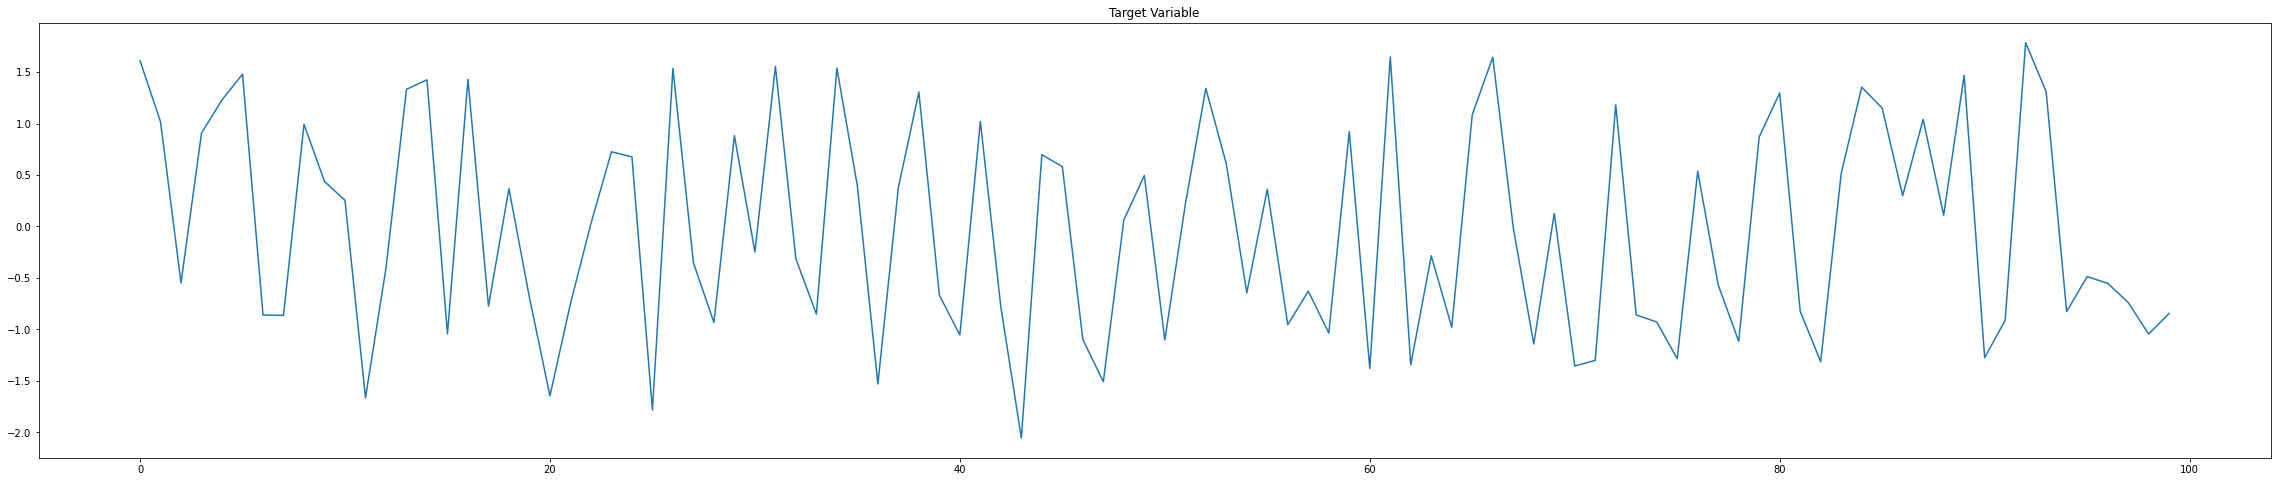

In [9]:
# Define features and target variable
df_features=df.iloc[:,:24]
df_index=df.iloc[:,24]
plt.figure(figsize=(40, 8))
df_index.iloc[:100].plot()
plt.title('Target Variable')
plt.show()

### Exploratory Data Analysis

C:\Users\darya\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


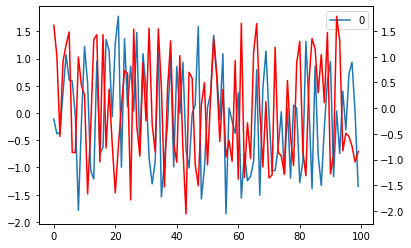

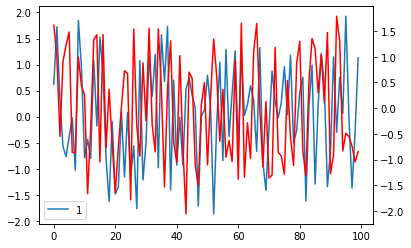

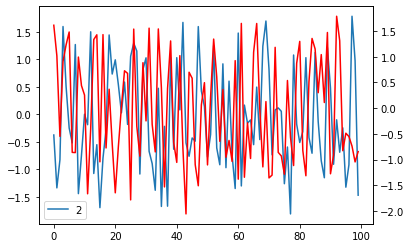

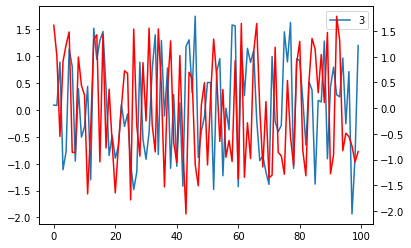

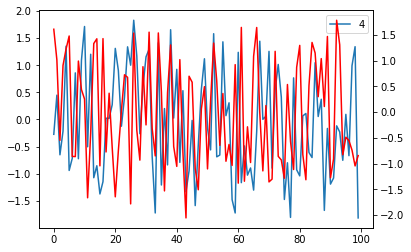

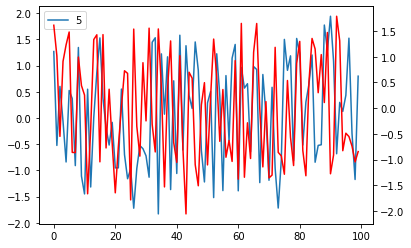

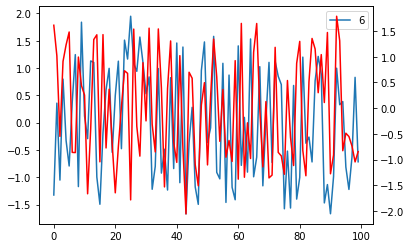

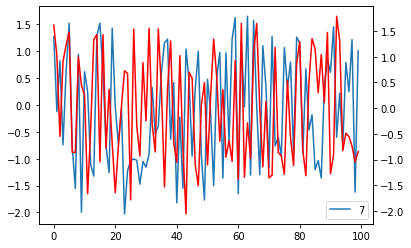

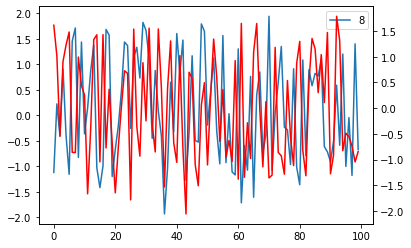

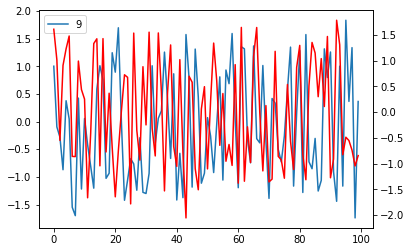

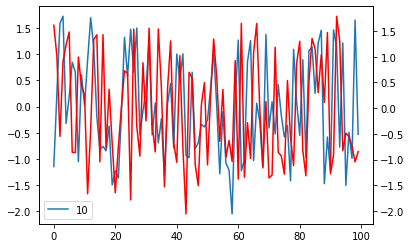

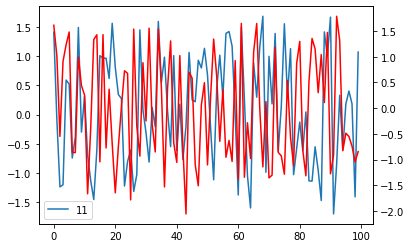

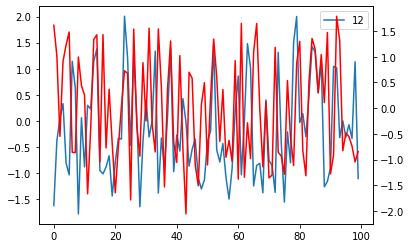

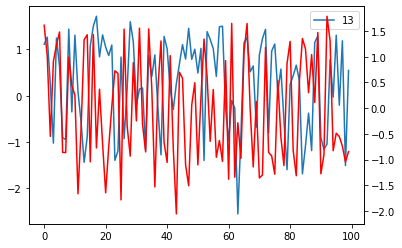

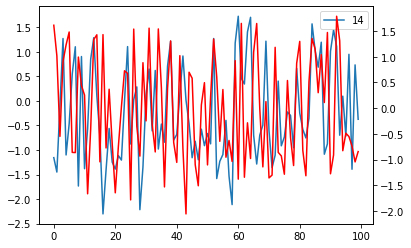

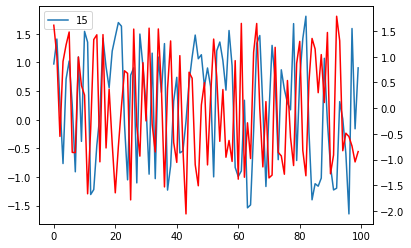

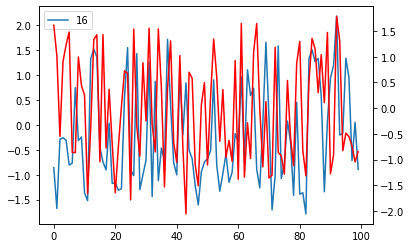

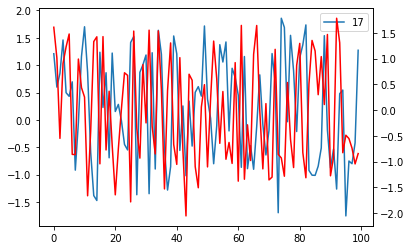

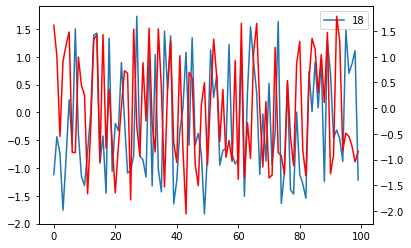

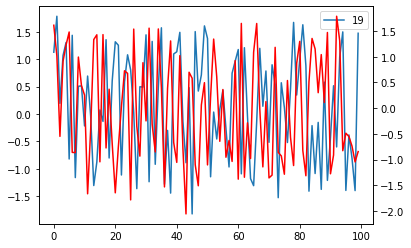

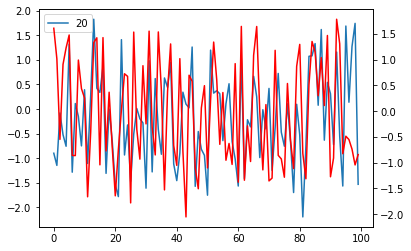

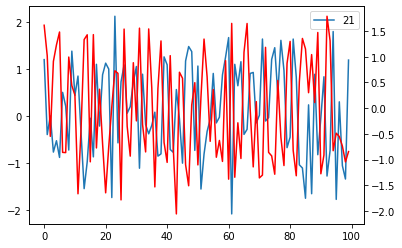

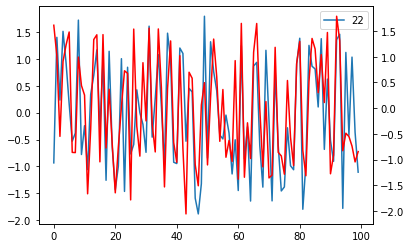

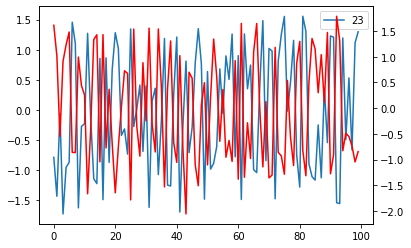

In [10]:
#for col in df_features.columns:
#    ax = df_features.iloc[:100,:].plot(kind='line', y=col)
#    df_index.iloc[:100].plot(kind='line', y='24',color='red', ax=ax, secondary_y=True)
#plt.show()

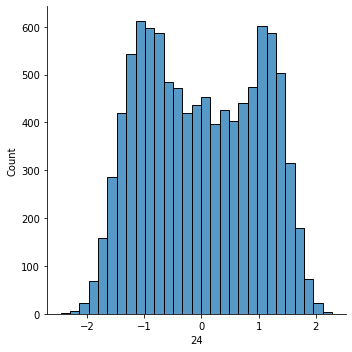

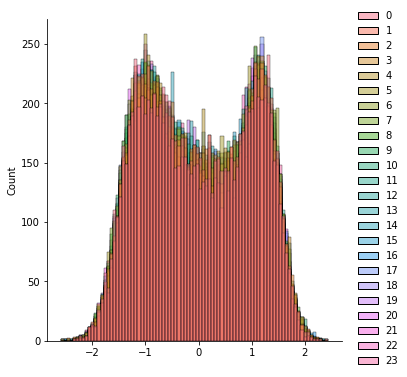

In [11]:
#Distribution of the data
sn.displot(df_index.iloc[:10000])
sn.displot(df_features.iloc[:10000,:])
plt.show()

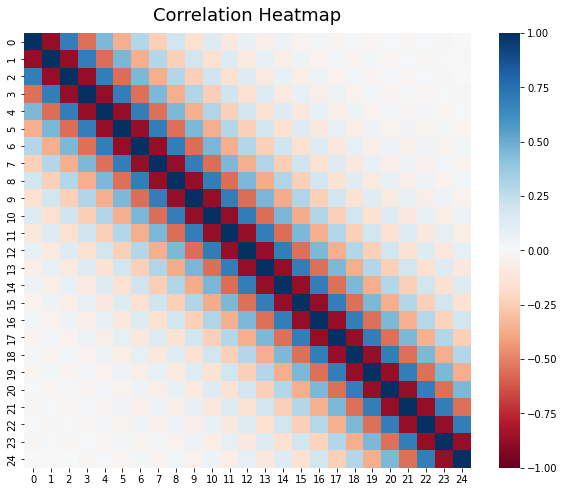

In [12]:
#Correlation heat map
corrMatrix = df.corr()
plt.figure(figsize=(10, 8))
heatmap=sn.heatmap(corrMatrix, vmin=-1, vmax=1,  annot=False, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

The correlation coefficients indicate strong linear relationship between variables

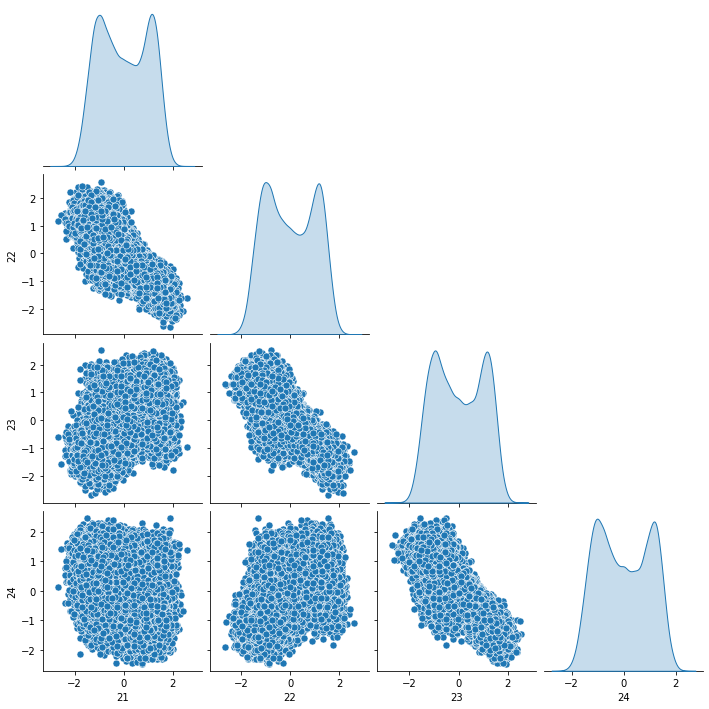

In [13]:
#Pairplots for features with highest correlation
sn.pairplot(df.iloc[:,21:25], diag_kind='kde', plot_kws=dict(s=50), diag_kws=dict(shade=True), corner=True)

### Autocorrelation

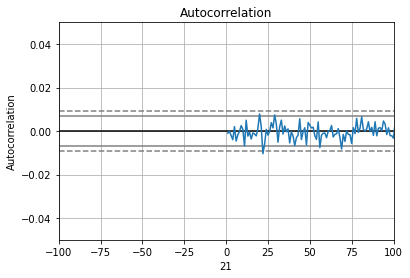

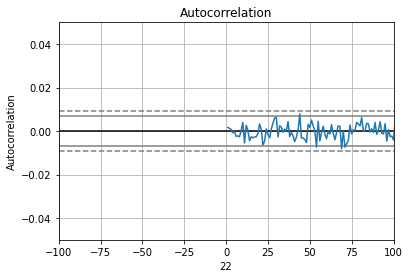

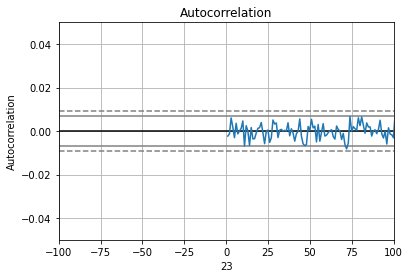

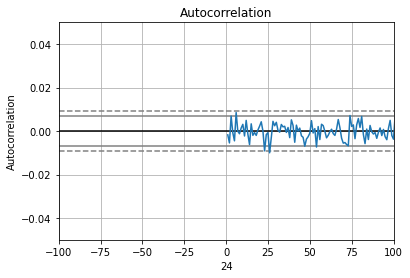

In [14]:
# Creating Autocorrelation plot
for col in df.iloc[:,21:25].columns:
    acf = pd.plotting.autocorrelation_plot(df.iloc[:,col].values)
    acf.plot()
    plt.xlabel('Lag')
    plt.xlabel(str(col))
    plt.title('Autocorrelation')  
    plt.ylim(-0.05,0.05)
    plt.xlim(-100,100)
    plt.show()
# Display
plt.show()

In [15]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

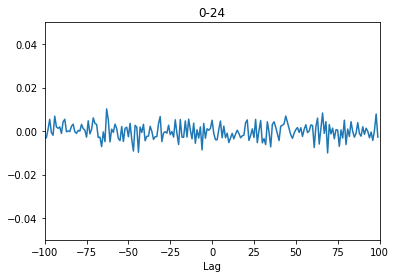

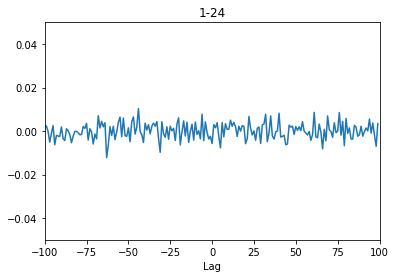

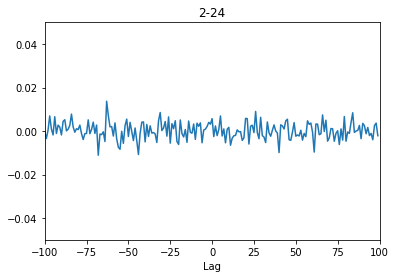

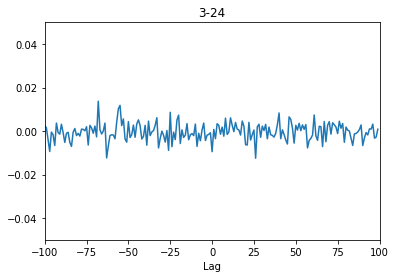

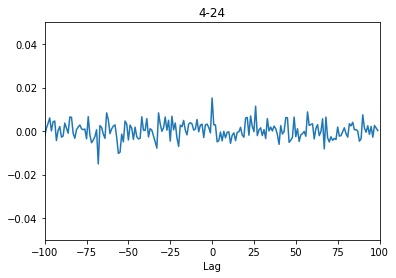

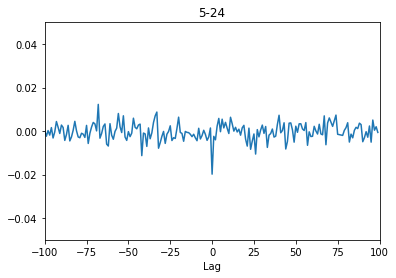

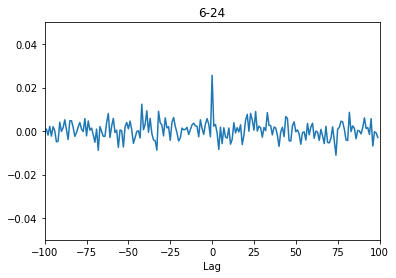

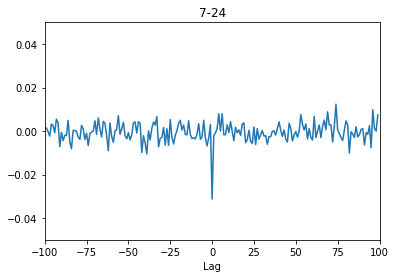

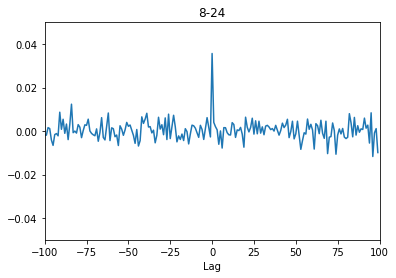

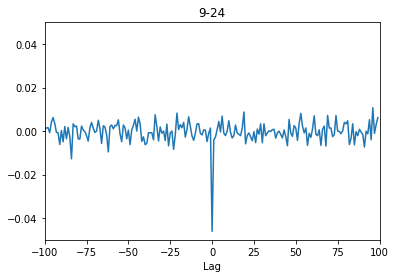

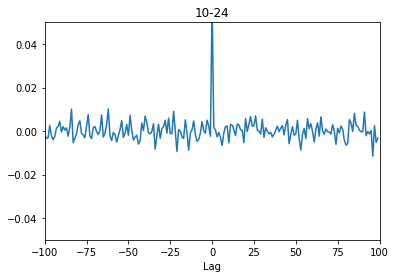

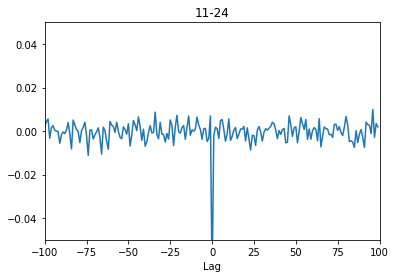

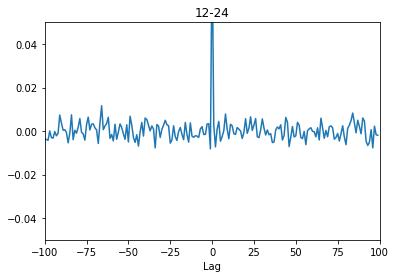

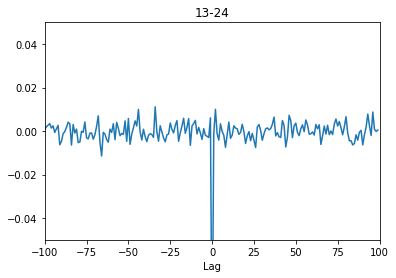

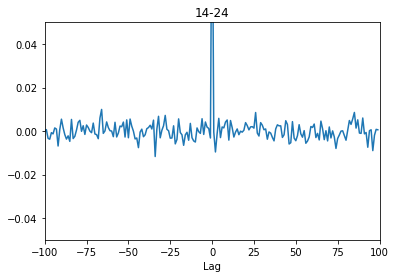

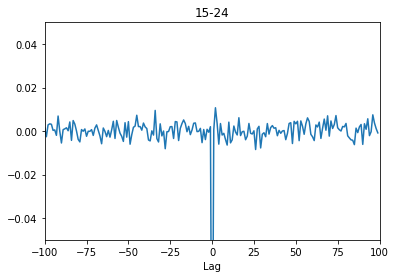

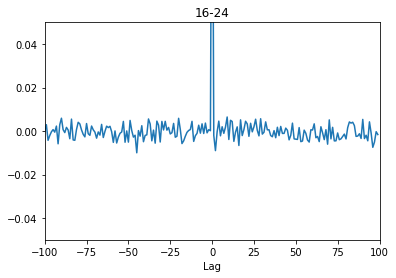

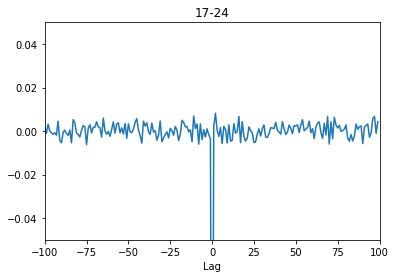

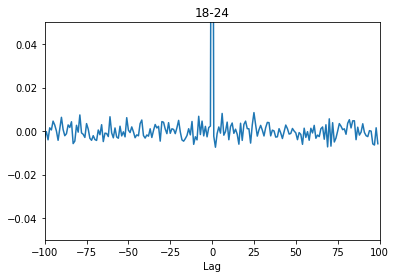

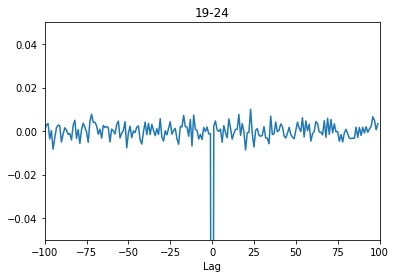

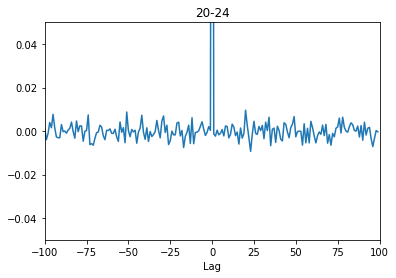

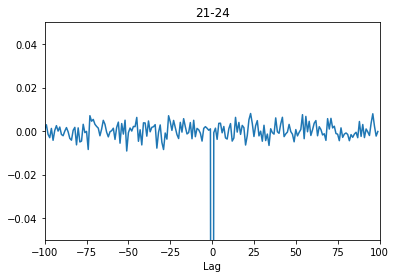

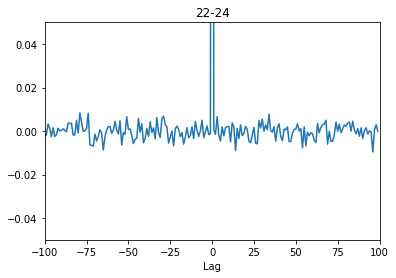

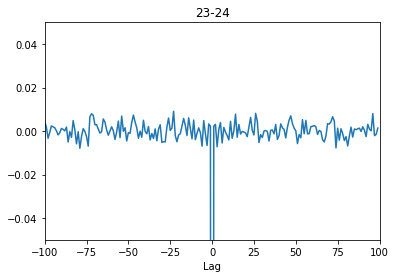

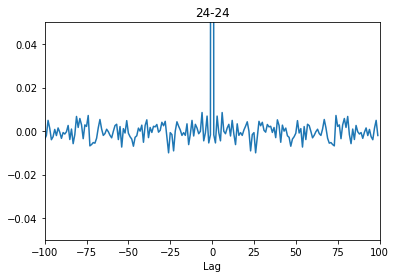

In [16]:
for col in df.columns:
    res1=df.iloc[:,col]
    res2=df.iloc[:,24]
    maxDelta=100
    step=1
    range1= range(-maxDelta,maxDelta,step)
    lagged_correlation = [crosscorr(res1, res2, lag=t) for t in range(-maxDelta,maxDelta,step)]
    plt.plot(range1,lagged_correlation)
    plt.title(str(col)+'-24')
    plt.xlabel('Lag')
    plt.ylim(-0.05,0.05)
    plt.xlim(-maxDelta,maxDelta)
    plt.show()

In [36]:
def evaluate_model(X, y, model):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    fitted_model = model.fit(X_train, y_train)
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error, r2_score 
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_r2=round(train_r2,3)
    train_mse=round(train_mse,3)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_r2=round(test_r2,3)
    test_mse=round(test_mse,3)
    
    df_results = abs(y_test)- abs(y_test_pred)
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_train, y=y_train_pred, c="#7CAE00", alpha=0.3)

    z = np.polyfit(y_train, y_train_pred, 1)
    p = np.poly1d(z)

    plt.plot(y_train,p(y_train),"#F8766D")
    plt.ylabel('Predicted values')
    plt.title('Training dataset')
    plt.xlabel('Actual values')
   
    plt.figure(figsize=(5,5))
    z = np.polyfit(y_test, y_test_pred, 1)
    p = np.poly1d(z)

    plt.plot(y_test,p(y_test),"#F8766D")
    plt.ylabel('Predicted values')
    plt.title('Test dataset')
    plt.xlabel('Actual values')
    plt.scatter(x=y_test, y=y_test_pred, c="#7CAE00", alpha=0.3)
    #df_index.plot(kind='line',x='Date',y='MSCI All Country World Index',color='red')
    #plt.show()
    #plt.scatter(x='Date', y='y', c="#7CAE00", alpha=0.3)
    plt.show()
    residuals=y_test-y_test_pred
    sn.displot(residuals)
    plt.title('Residuals')
    plt.xlabel('Residuals')
    plt.show()
    return {
        'train_mse': train_mse,
        'train_r2': train_r2,
        'test_mse': test_mse,
        'test_r2': test_r2
    }

In [37]:
def evaluate_models(x, y):
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(max_depth=6, random_state=42)
    from sklearn.ensemble import GradientBoostingRegressor
    gb = GradientBoostingRegressor(random_state=2)
    from xgboost import XGBRegressor
    xgb = XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0, max_depth=3)
    for name, model in [
        ('linear regression', lr), 
        ('random forest', rf),
        ('gradient boosting', gb),
        ('XGBoosting', xgb)
    ]:
        print (name, '\n', evaluate_model(x, y, model))

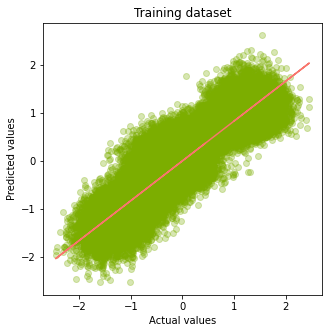

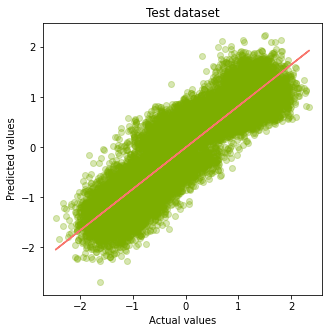

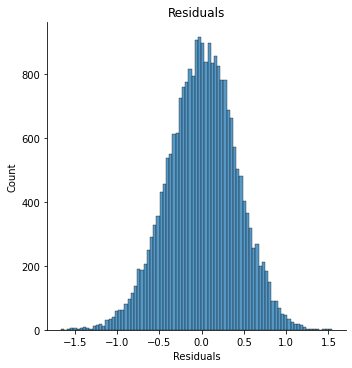

linear regression 
 {'train_mse': 0.168, 'train_r2': 0.832, 'test_mse': 0.169, 'test_r2': 0.831}


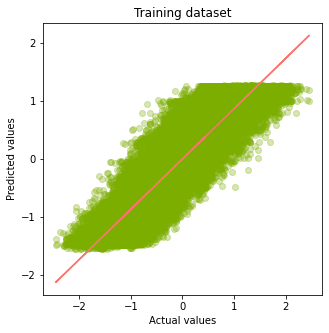

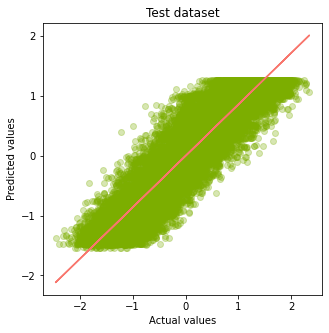

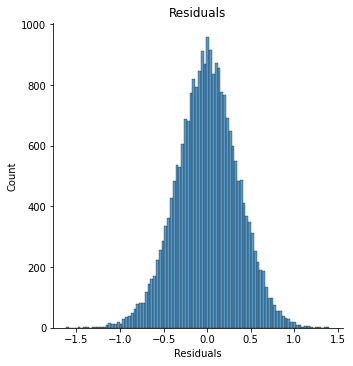

random forest 
 {'train_mse': 0.121, 'train_r2': 0.879, 'test_mse': 0.124, 'test_r2': 0.876}


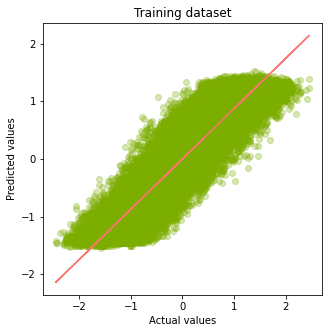

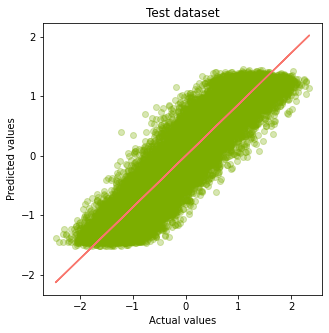

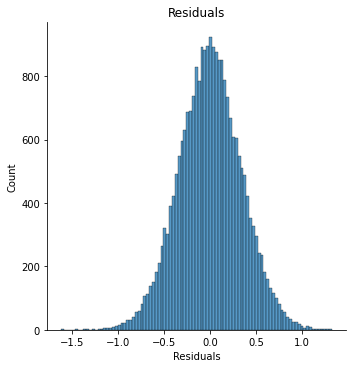

gradient boosting 
 {'train_mse': 0.112, 'train_r2': 0.888, 'test_mse': 0.116, 'test_r2': 0.885}


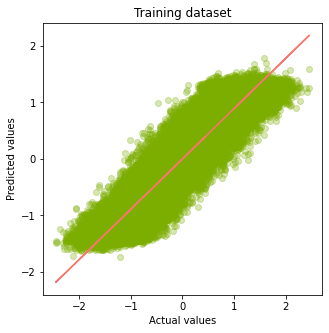

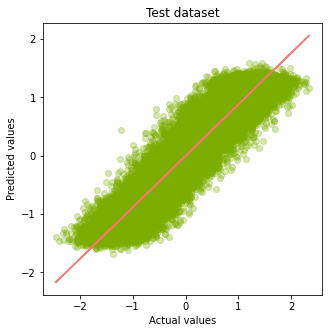

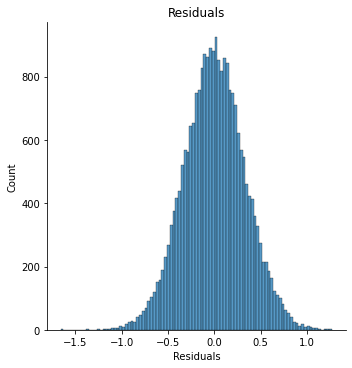

XGBoosting 
 {'train_mse': 0.103, 'train_r2': 0.896, 'test_mse': 0.11, 'test_r2': 0.891}


In [38]:
evaluate_models(df_features, df_index)

In [20]:
from xgboost import XGBRegressor

### Feature Selection

In [21]:
#Feature Selection
def RFE_Feature_Selection(X,y):
    from sklearn.feature_selection import RFE
    from sklearn.ensemble import RandomForestRegressor
    # #Selecting the Best important features according to Logistic Regression
    rfe_selector = RFE(estimator=RandomForestRegressor(),n_features_to_select = 5, step = 1)
    rfe_selector.fit(X, y)
    return X.columns[rfe_selector.get_support()]

In [22]:
#Feature Selection
def Boruta_Feature_Selection (X,y):
    from boruta import BorutaPy
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    ###initialize Boruta
    forest = RandomForestRegressor(
       n_jobs = -1, 
       max_depth = 5
    )
    boruta = BorutaPy(
       estimator = forest, 
       n_estimators = 'auto',
       max_iter = 100 # number of trials to perform
    )
    ### fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X), np.array(y))
    ### print results
    green_area = X.columns[boruta.support_].to_list()
    blue_area = X.columns[boruta.support_weak_].to_list()
    return green_area
    print('features in the green area:', green_area)
    print('features in the blue area:', blue_area)

In [23]:
df_features_selected = df_features[Boruta_Feature_Selection(df_features.iloc[:1000,],df_index.iloc[:1000].values.ravel())]

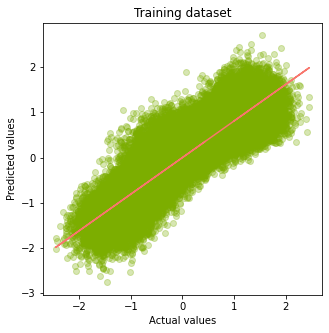

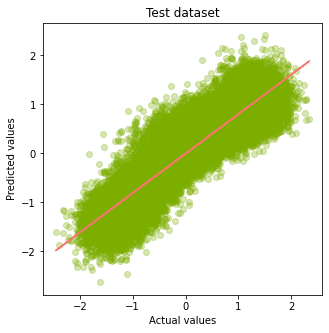

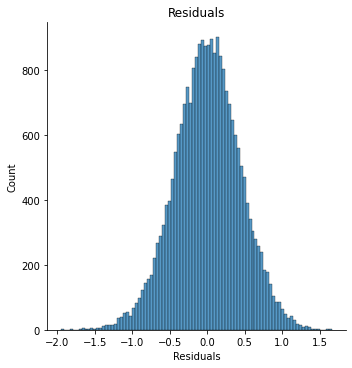

linear regression 
 {'train_mse': 0.19136786060343636, 'train_r2': 0.8082902611460127, 'test_mse': 0.19283986669389772, 'test_r2': 0.8079571646439356}


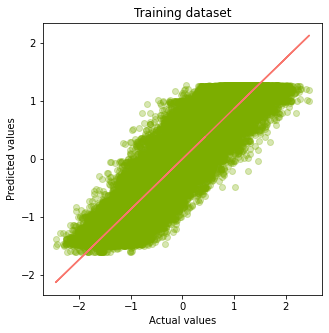

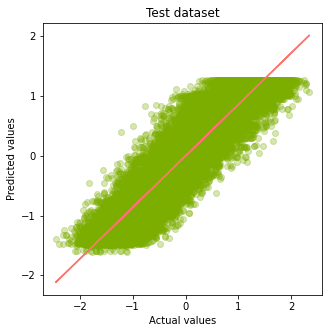

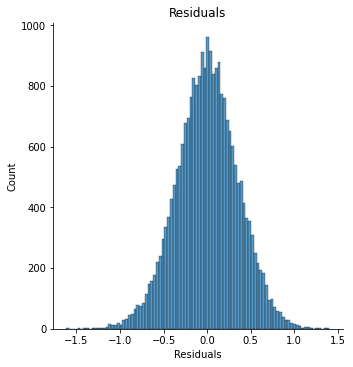

random forest 
 {'train_mse': 0.12134417665541014, 'train_r2': 0.8784390422471857, 'test_mse': 0.12452307305877788, 'test_r2': 0.8759915964087586}


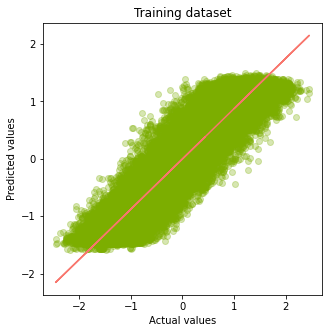

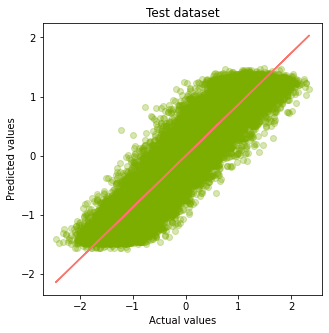

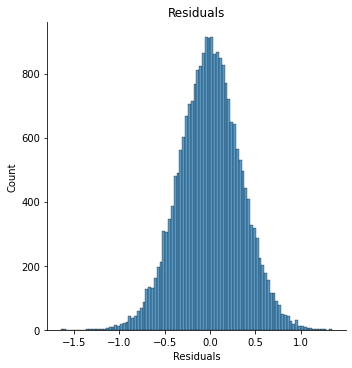

gradient boosting 
 {'train_mse': 0.11487822894275154, 'train_r2': 0.8849165413608224, 'test_mse': 0.11760891903189691, 'test_r2': 0.8828771733704895}


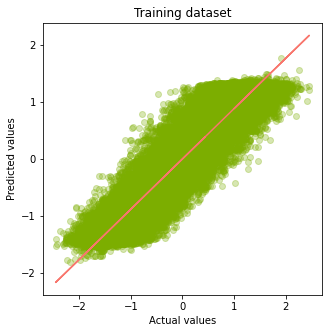

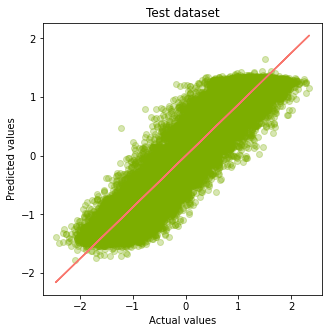

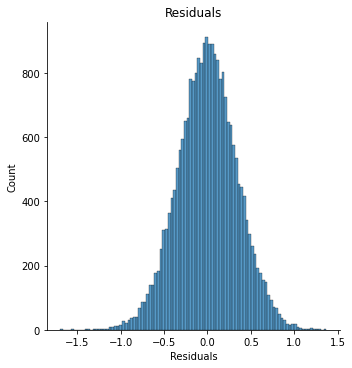

XGBoosting 
 {'train_mse': 0.11333439031909559, 'train_r2': 0.886463138048691, 'test_mse': 0.11782763880463434, 'test_r2': 0.8826593575939852}


In [24]:
evaluate_models(df_features_selected, df_index)

## Hyperparameters Optimization

In [25]:
# Leave only last 6 months as previous data does not improve predictions
X_train = np.array(df.iloc[:60000, 17:24])
y_train = np.array(df.iloc[:60000, 24])

X_test = np.array(df.iloc[60000:, 17:24])
y_test = np.array(df.iloc[60000:, 24])

In [26]:
from skopt import forest_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_evaluations, plot_objective
from sklearn.metrics import mean_squared_error
#search space for xgboost regressor
search_space = [Integer(10, 200, name='n_estimators'),
                Integer(2, 20, name='max_depth'),
                Real(0.01, 10, prior='log-uniform', name='gamma'),
                Real(0.01, 10, prior='log-uniform', name='reg_lambda'),
                Real(0.01, 10, prior='log-uniform', name='min_child_weight'),
                ]
#static params
static_params = {'learning_rate': 0.1,
                'objective': 'reg:squarederror',
                'seed': 0,
                'verbosity': 1,
                'n_jobs': -1,
}

@use_named_args(search_space)
def objective(**params):
    params.update(static_params)
    reg = XGBRegressor(**params)
    reg.fit(X_train, y_train)
    err = mean_squared_error(y_test, reg.predict(X_test))
    print(params, err)
    return err


{'n_estimators': 57, 'max_depth': 2, 'gamma': 0.6431172050131996, 'reg_lambda': 0.43117100586854934, 'min_child_weight': 0.18662266976517972, 'learning_rate': 0.1, 'objective': 'reg:squarederror', 'seed': 0, 'verbosity': 1, 'n_jobs': -1} 0.13849607961572066
{'n_estimators': 31, 'max_depth': 20, 'gamma': 0.20547625125911337, 'reg_lambda': 4.734989304499478, 'min_child_weight': 7.780155576901419, 'learning_rate': 0.1, 'objective': 'reg:squarederror', 'seed': 0, 'verbosity': 1, 'n_jobs': -1} 0.10968612833391694
{'n_estimators': 68, 'max_depth': 3, 'gamma': 2.372330072992195, 'reg_lambda': 0.38608662714605463, 'min_child_weight': 0.5059803874660433, 'learning_rate': 0.1, 'objective': 'reg:squarederror', 'seed': 0, 'verbosity': 1, 'n_jobs': -1} 0.11835379606444403
{'n_estimators': 175, 'max_depth': 15, 'gamma': 0.10284625479837635, 'reg_lambda': 0.8800667561385509, 'min_child_weight': 0.12726958252506762, 'learning_rate': 0.1, 'objective': 'reg:squarederror', 'seed': 0, 'verbosity': 1, 'n_j

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

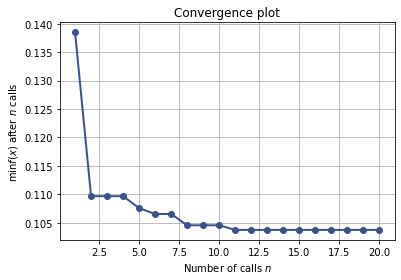

In [27]:
#from sklearn.metrics import mean_squared_error as error
res = forest_minimize(objective, search_space, n_calls=20, n_initial_points=5, random_state=0)
print('Best params', res.x)
plot_convergence(res)

array([[<AxesSubplot:xlabel='n_estimators', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_depth'>,
        <AxesSubplot:xlabel='max_depth', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='gamma'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='gamma', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='reg_lambda'>, <AxesSubplot:>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='reg_lambda', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='n_estimators', ylabel='min_child_weight'>,
        <AxesSubplot:xlabel='max_depth'>, <AxesSubplot:xlabel='gamma'>,
        <AxesSubplot:xlabel='reg_lambda'>,
        <AxesSubplot:xlabel='min_child_weight', ylabel='Partial dependence'>]],
      dtype=object)

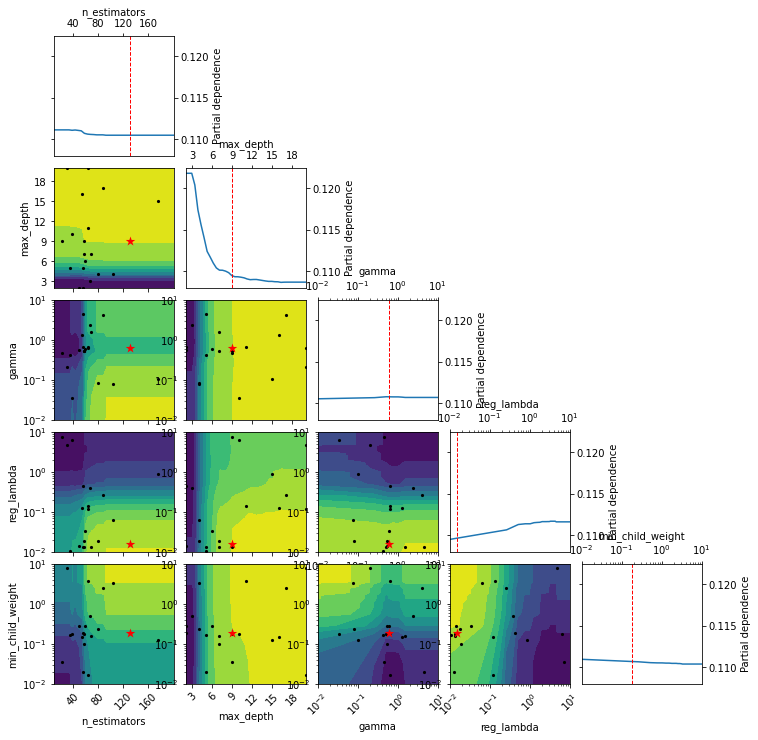

In [28]:
plot_objective(res)

In [39]:
reg = XGBRegressor(n_estimators=int(res.x[0]), max_depth=int(res.x[1]), gamma=res.x[2], reg_lambda=res.x[3], min_child_weight=res.x[4])
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.6073903889644915, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=9,
             min_child_weight=0.18337985261149636, missing=nan,
             monotone_constraints='()', n_estimators=131, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.015459427128236617, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score 
test_mse = mean_squared_error(y_test,y_pred)
test_r2 = r2_score(y_test,y_pred)
print('test mse ',round(test_mse,3),'test_r2 ', round(test_r2,3))

test mse  0.107 test_r2  0.892


### GMM Clustering

In [31]:
from sklearn import mixture
from sklearn.mixture import GaussianMixture

k=23
data=df_features.iloc[:,k].values
data=data.reshape(-1, 1)
gmm = mixture.GaussianMixture(n_components=2, max_iter=1000, covariance_type='full').fit(data)

print('means')
print(gmm.means_)
#print(gmm.covariances_)
print('std')
print(np.sqrt(gmm.covariances_))
#gmm.fit(df_features.values)

#print(gmm.means_, gmm.predict_proba(df_index.values))
name='label'+str(k)
df_features[name]=gmm.predict(data)


means
[[ 0.91203846]
 [-0.80747285]]
std
[[[0.49854953]]

 [[0.52615366]]]


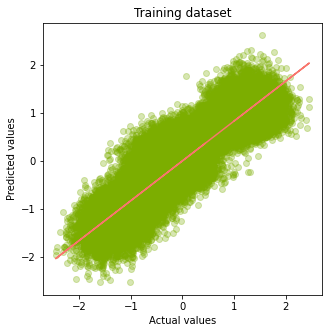

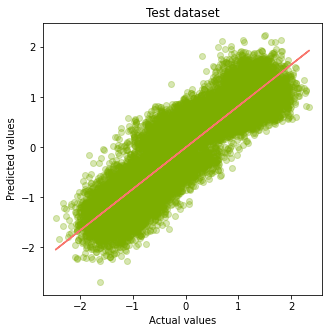

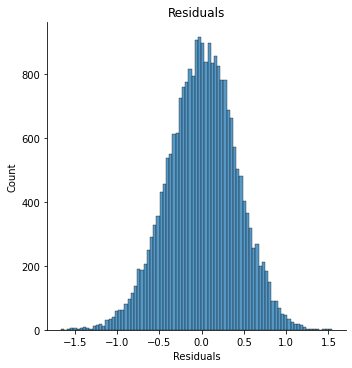

linear regression 
 {'train_mse': 0.16802943764443928, 'train_r2': 0.8316703781448902, 'test_mse': 0.16949784956063096, 'test_r2': 0.8312027062949154}


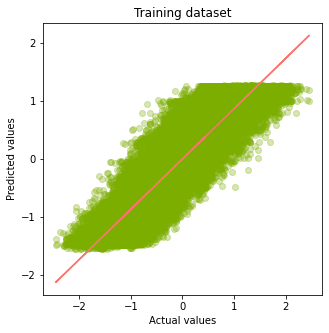

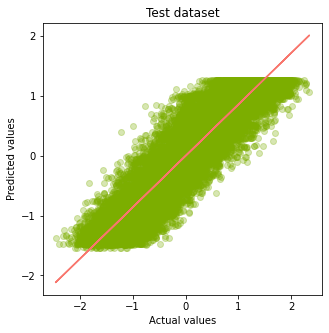

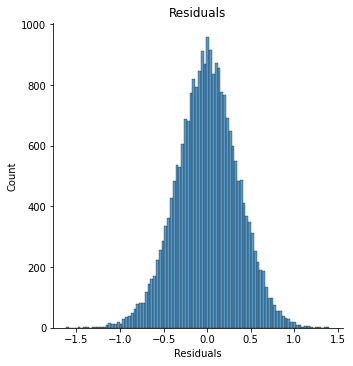

random forest 
 {'train_mse': 0.12108940580391454, 'train_r2': 0.8786942682462318, 'test_mse': 0.12445459090734609, 'test_r2': 0.8760597955148756}


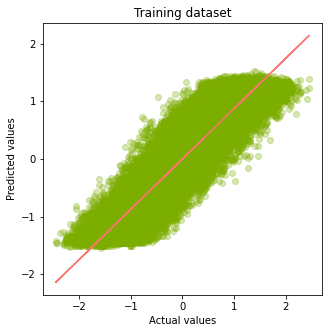

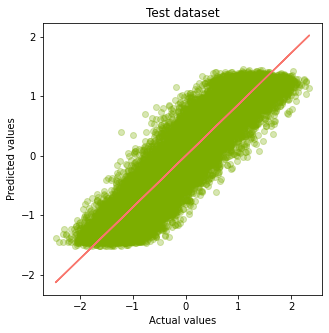

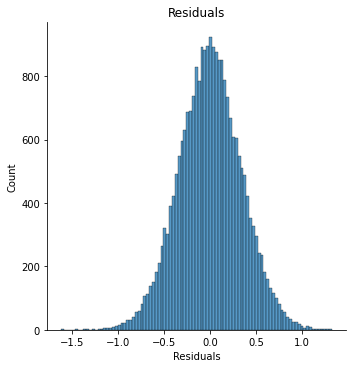

gradient boosting 
 {'train_mse': 0.11220420816772399, 'train_r2': 0.8875953392679223, 'test_mse': 0.11560134659964993, 'test_r2': 0.8848764482542633}


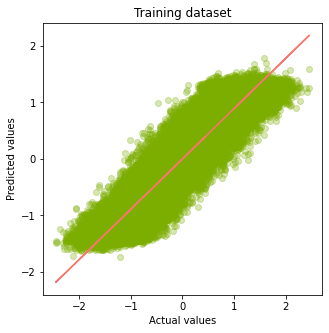

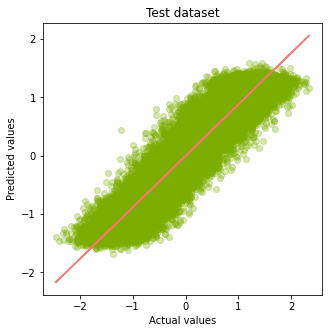

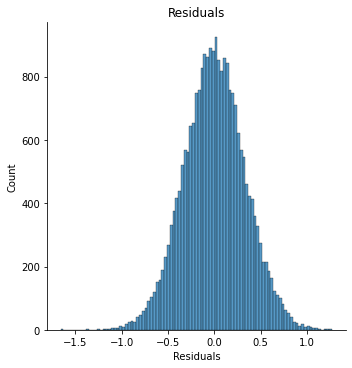

XGBoosting 
 {'train_mse': 0.10337203065992694, 'train_r2': 0.8964432954408798, 'test_mse': 0.10952261586941271, 'test_r2': 0.8909300548285398}


In [32]:
evaluate_models(df_features, df_index)

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_features)
df['label']=kmeans.labels_

In [34]:
df_features_0 = df_features.loc[df['label'] == 0]
df_features_1 = df_features.loc[df['label'] == 1]
df_index_0=df_index.loc[df['label'] == 0]
df_index_1=df_index.loc[df['label'] == 1]

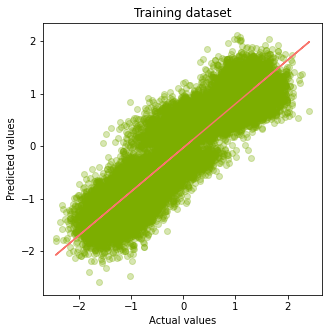

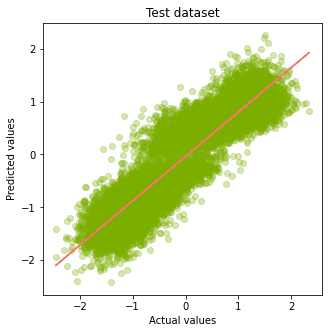

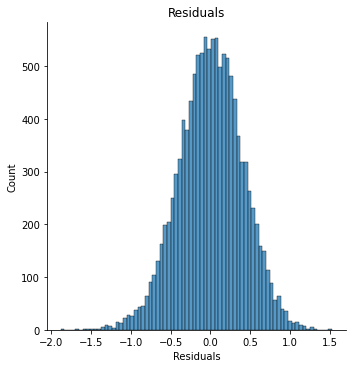

linear regression 
 {'train_mse': 0.1580479277382244, 'train_r2': 0.8368709260503934, 'test_mse': 0.16112481976080673, 'test_r2': 0.8332094404393731}


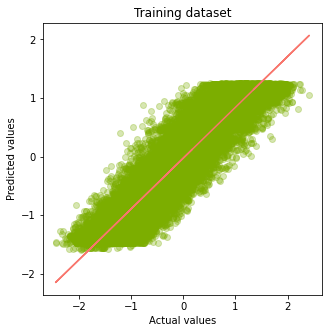

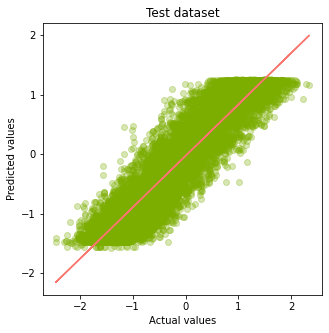

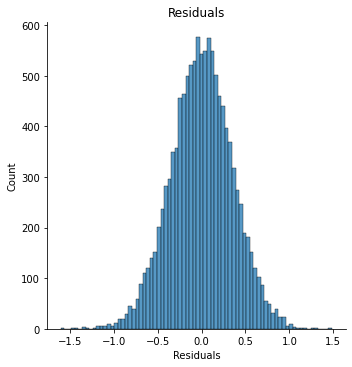

random forest 
 {'train_mse': 0.11729068648015509, 'train_r2': 0.8789384882026907, 'test_mse': 0.12362412436190594, 'test_r2': 0.8720287978715838}


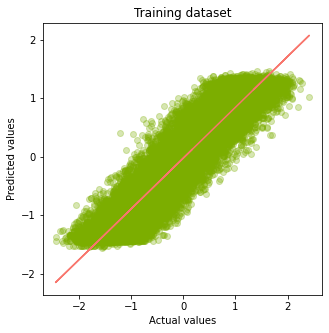

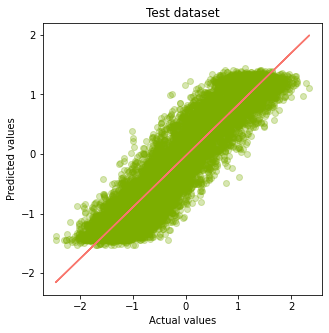

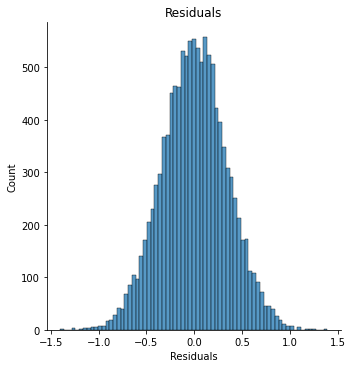

gradient boosting 
 {'train_mse': 0.11098591673118437, 'train_r2': 0.8854459525227454, 'test_mse': 0.116809800648622, 'test_r2': 0.8790827382071146}


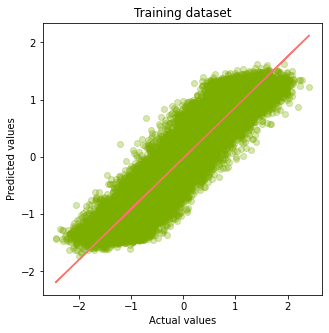

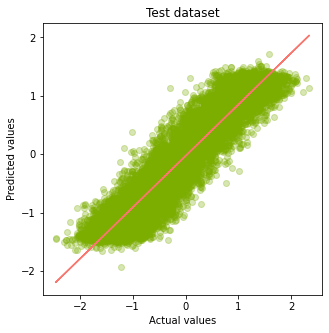

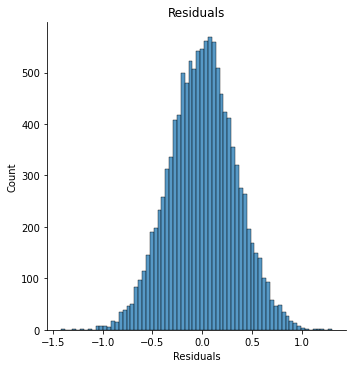

XGBoosting 
 {'train_mse': 0.09968672701213616, 'train_r2': 0.8971084044234259, 'test_mse': 0.11222935302700139, 'test_r2': 0.8838242511719228}


In [35]:
#evaluate_models(df_features_0, df_index_0)
evaluate_models(df_features_1, df_index_1)

## End of the notebook